# Gradient Descent
Here we attempt to use gradient technique to solve the linear function.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lin(a, b, x):
    return a*x + b

In [4]:
def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n)
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

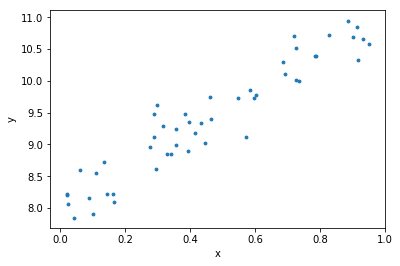

In [10]:
x, y = gen_fake_data(50, 3., 8.)
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y");

We want to find parameters a and b such that the error between the points and the line ax + b is minimized. We can use the mean squared error loss function.

In [11]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [13]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.0267967644705438

In [14]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [15]:
mse_loss(10, 5, x, y)

4.0267967644705438

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle _optimization_: how do we find the best values of a and b?

In [44]:
A = 3.
B = 8.

In [45]:
train_x, train_y = gen_fake_data(10000, A, B)
train_x.shape, train_y.shape

((10000,), (10000,))

In [46]:
import tensorflow as tf

In [47]:
x, y = tf.placeholder("float"), tf.placeholder("float")

In [48]:
w = tf.Variable([1.0, 2.0], name="w")

In [49]:
LEARNING_RATE = 1e-3

In [50]:
y_model = tf.multiply(x, w[0]) + w[1]
error = tf.square(y - y_model)

In [51]:
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error)

In [52]:
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(len(train_x)):
        session.run(train_op, feed_dict={x: train_x[i], y: train_y[i]})

    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

Predicted model: 3.247x + 7.859
